<a href="https://colab.research.google.com/github/MiguelAngel-ht/Image_Processing_/blob/main/Work_8__Smooting_Images_/CODE_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORT LIBRARIES
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

# **High-Boost Filters**

Gaussian Kernel have the following shape

$G_σ = \frac{1}{2πσ^2} e^{-\frac{x^2+y^2}{2σ^2}}$

donde $x$ y $y$ son el largo y ancho del kernel.

In [2]:
# HIGH-BOOST FILTER WITH GAUSSIAN KERNEL

def IGBoost(img, n, sigma, c):
  
  kernel = cv.getGaussianKernel(n, sigma)       # GAUSSIAN VECTOR
  window = np.outer(kernel, kernel.transpose())   # GAUSSIAN MATRIX
  img_fil = cv.filter2D(img, -1, window)

  mask = img - img_fil
  img_highboost = img + c*mask        # ADD PARAMETER WITH MASK

  return img_highboost

Laplacian kernel is defined in function of $\alpha$ like

$kernel = \frac{4}{1+\alpha} 
\begin{pmatrix}
 \frac{\alpha}{4}&  \frac{1-\alpha}{4}  &\frac{\alpha}{4}  \\
\frac{1-\alpha}{4}  & -1 & \frac{1-\alpha}{4}  \\
 \frac{\alpha}{4}& \frac{1-\alpha}{4}  &\frac{\alpha}{4} 
\end{pmatrix} = \frac{1}{1+\alpha} 
\begin{pmatrix}
\alpha &  1-\alpha  &\alpha  \\
1-\alpha & -4 & 1-\alpha  \\
\alpha & 1-\alpha  &\alpha 
\end{pmatrix}$



In [3]:
# LAPLACIAN KERNEL OF N DIMENTIONS AND ALPHA SHAPE
def Laplacian_kernel(n, a): 
  kernel= np.zeros((n,n))
  b = 1 - a
  lap = (1 / (1+ a)) * np.asarray([[a, b, a],
                                  [b, -4, b],
                                  [a, b, a]])
  k = n // 2
  kernel[k-1:k+2, k-1:k+2] = lap
  return kernel

In [4]:
# HIGH-BOOST FILTER WITH LAPLACIAN KERNEL
def IGLaplacian(img, alpha, c):

  kernel = Laplacian_kernel(3, alpha)  # KERNEL OF 3X3
  mask = cv.filter2D(img, -1, kernel)
  img_fill = img + c*mask

  return img_fill

In [5]:
# FUNCTION THAT PLOT ALL OF IMAGES TOGETHER
def show_images(images, names, min, max, file):

  fig, axs = plt.subplots(1, len(names), figsize=(12, 6), constrained_layout=True)

  for i, (ax, img) in enumerate(zip(axs.flat, images)):
    ax.set_title(names[i])
    pcm = ax.imshow(img, 'gray', vmin = min, vmax = max)
    fig.colorbar(pcm, ax=ax, location='bottom') # placing colorbar in x axis
    #cv.imwrite('Results/' + names[i] + '.png', img) # save image
  
  plt.savefig(file + '.png', dpi=300) # dpi to high quality
  plt.show()

In [6]:
# READ IMAGE 
img = cv.imread('/content/Fig0303(a).tif', 0) # 0 -> grayscale

images = [img]   # ADD ORIGINAL IN A LIST
images.append(IGBoost(img, 25, 5, 4))  # ADD IGBOOST KERNEL 25 PIXELS, SIGMA = 5 Y PARAMETER C = 4 
images.append(IGLaplacian(img, 0, -1)) # ADD IGLAPLACIAN ALPHA = 0 Y PARAMETER C = -1

names = ['Original', 'IGBoost', 'IGLaplacian']

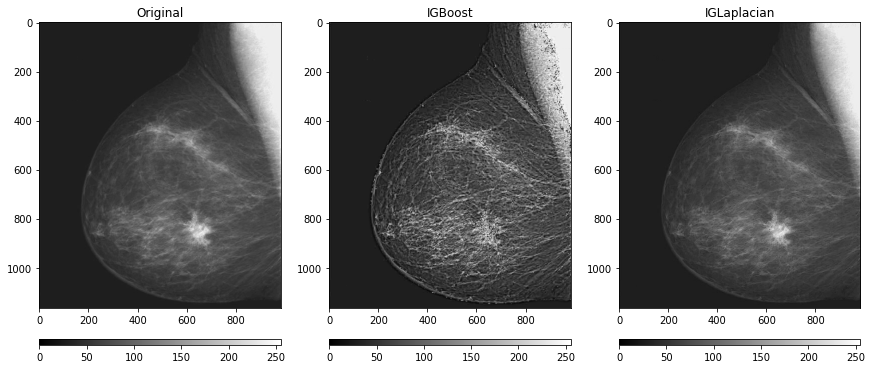

In [7]:
show_images(images, names, 0, 255, 'plot1')

# **Smooting Images**

Box Kernel is the mean of a matrix 

$kernel_{box} = \frac{1}{k_{heigth}\cdot k_{width} } \begin{pmatrix}
1 & ... & 1 \\
\vdots  &  & \vdots \\
 1 & \cdots  & 1
\end{pmatrix}$

In [8]:
img2 = cv.imread('/content/Fig0319(a).tif', 0)
img2_noise = cv.imread('/content/Fig0319Noise.tif', 0)

In [9]:
images_2 = [img2_noise]
images_2.append(cv.boxFilter(img2_noise, -1, (10,10) ))
images_2.append(cv.GaussianBlur(img2_noise, (5, 5), 0))
images_2.append(img2)

titles = ['Noise', 'Box Filter', 'Gaussian', 'Original_']

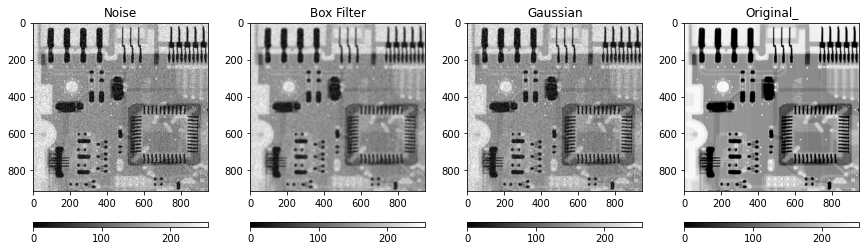

In [10]:
show_images(images_2, titles, 0, 255, 'plot2')

In [11]:
images_3 = [img2_noise]
images_3.append(cv.medianBlur(img2_noise, 5))
images_3.append(cv.bilateralFilter(img2_noise, 9, 75, 75))
images_3.append(img2)

titles_3 = ['Noise', 'Median Blur', 'Bilateral Filter', 'Original']

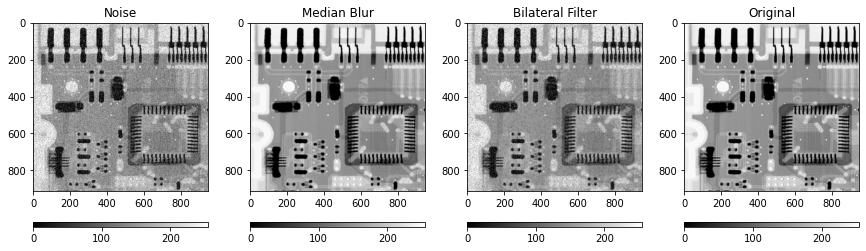

In [12]:
show_images(images_3, titles_3, 0, 255, 'plot3')

## **REFERENCE**

[OpenCV](https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html)